# Pemodelan

In [1]:
#import lib
import csv
import pandas as pd
import numpy as np
import string
import re
import nltk

#
import matplotlib.pyplot as plt
import seaborn as sns

# Analisi Sentimen

### Source CODE dari
https://github.com/commitunuja/analisis-sentimen-naive-bayes-tf-idf/blob/master/.ipynb_checkpoints/Untitled-checkpoint.ipynb

In [2]:
# %run S_4_Analisis_sentimen.ipynb

# Naive Bayes Classifier in Python KAGGLE
https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python

In [3]:
datax = pd.read_csv('E:\Program\[2] Program\AnSent\Data\Data_5_Lex_sen\Lex_Indihome.csv')

# menghapus kolom
del datax['Unnamed: 0.1']
del datax['Unnamed: 0']
# datas = datax.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Data Teks', 'Data Teks_CaseFolding', 'Data Teks_clean_alay', 'Data Teks_Token', 'Data Teks_Stopword', 'Jumlah_polarity'])
# data.rename( columns={'Unnamed: 0':'Indeks'}, inplace=True )
data = datax.copy()
data = data[data.sentimen != 'netral']
data['sentimen'].value_counts

<bound method IndexOpsMixin.value_counts of 0       positif
2       negatif
3       negatif
4       negatif
5       negatif
         ...   
7059    positif
7060    negatif
7061    negatif
7063    positif
7064    positif
Name: sentimen, Length: 6528, dtype: object>

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Data Teks_Stemming'].astype('U'))
print(text_tf)
text_tf = tf.fit_transform(data['Data Teks_Stemming'].astype('U')).toarray()

  (0, 5975)	0.33280346984468734
  (0, 6884)	0.9429962091436722
  (1, 6846)	0.21985935906966791
  (1, 7011)	0.21757430472450523
  (1, 1878)	0.3422580142869826
  (1, 5890)	0.18998351018617643
  (1, 3319)	0.18655472715477978
  (1, 2259)	0.308869271035849
  (1, 1782)	0.25424075294567694
  (1, 7953)	0.3422580142869826
  (1, 5920)	0.10786887867444157
  (1, 7889)	0.5689506431327935
  (1, 1822)	0.32212834514061117
  (2, 749)	0.2513876087361953
  (2, 1481)	0.36385755101852246
  (2, 2910)	0.5912708687273275
  (2, 5444)	0.5198169790818287
  (2, 8161)	0.42965220911031526
  (3, 3054)	0.3352410564408897
  (3, 431)	0.43070207163817975
  (3, 1713)	0.3544509690036628
  (3, 5158)	0.43070207163817975
  (3, 3085)	0.15059930444644506
  (3, 7865)	0.25652823263312396
  (3, 4991)	0.342020812920609
  :	:
  (6526, 1286)	0.2565782496541561
  (6526, 4184)	0.31189628490343535
  (6526, 1223)	0.2565782496541561
  (6526, 2288)	0.2592394983886982
  (6526, 4364)	0.2101543911849387
  (6526, 7875)	0.22266223241194041
  (

In [5]:
#splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, data['sentimen'], test_size=0.2, random_state=42)

print('Banyak data train :',len(X_train))
print('Banyak data test  :',len(X_test))

Banyak data train : 5222
Banyak data test  : 1306


In [6]:
#Performa algoritma naive bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [7]:
clf = GaussianNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print ('GaussianNB Accuracy : {:.2f}'.format(accuracy_score(y_test, predicted)*100))
print ('GaussianNB Precision : {:.2f}'.format(precision_score(y_test, predicted, average='macro')))
print ('GaussianNB Recall : {:.2f}'.format(accuracy_score(y_test, predicted)))
print ('GaussianNB f1_float : {:.2f}'.format(accuracy_score(y_test, predicted)))

conf = confusion_matrix(y_test, predicted, labels=['positif', 'negatif'])
print (f'confusion matrix: \n {conf}')
print ('======================================================\n')
print (classification_report(y_test, predicted, zero_division=0))

GaussianNB Accuracy : 59.88
GaussianNB Precision : 0.63
GaussianNB Recall : 0.60
GaussianNB f1_float : 0.60
confusion matrix: 
 [[423 117]
 [407 359]]

              precision    recall  f1-score   support

     negatif       0.75      0.47      0.58       766
     positif       0.51      0.78      0.62       540

    accuracy                           0.60      1306
   macro avg       0.63      0.63      0.60      1306
weighted avg       0.65      0.60      0.59      1306



<AxesSubplot:>

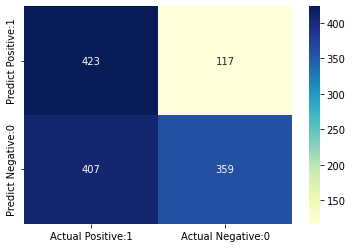

In [8]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=conf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [9]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print ('MultinomialNB Accuracy : {:.2f}'.format(accuracy_score(y_test, predicted)*100))
print ('MultinomialNB Precision : {:.2f}'.format(precision_score(y_test, predicted, average='macro')))
print ('MultinomialNB Recall : {:.2f}'.format(accuracy_score(y_test, predicted)))
print ('MultinomialNB f1_float : {:.2f}'.format(accuracy_score(y_test, predicted)))

conf = confusion_matrix(y_test, predicted, labels=['positif', 'negatif'])
print (f'confusion matrix: \n {conf}')
print ('======================================================\n')
print (classification_report(y_test, predicted, zero_division=0))

MultinomialNB Accuracy : 80.02
MultinomialNB Precision : 0.80
MultinomialNB Recall : 0.80
MultinomialNB f1_float : 0.80
confusion matrix: 
 [[369 171]
 [ 90 676]]

              precision    recall  f1-score   support

     negatif       0.80      0.88      0.84       766
     positif       0.80      0.68      0.74       540

    accuracy                           0.80      1306
   macro avg       0.80      0.78      0.79      1306
weighted avg       0.80      0.80      0.80      1306



<AxesSubplot:>

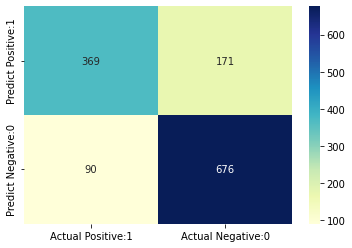

In [10]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=conf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')